In [4]:
from keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 6s 0us/step


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (value, key) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


In [43]:
import numpy as np 

def vectorize_sequences(sequences, dimension = 10000): 
    results = np.zeros((len(sequences), dimension))
    print(results)
    for i, sequence in enumerate(sequences):
        print(results[i, sequence])
        results[i, sequence] = 1.
        print(results[i, sequence])
    return results


    

In [38]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [44]:
vectorize_sequences([3,5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0
1.0
0.0
1.0


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,  activation = 'sigmoid'))

In [19]:
model.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [21]:
from keras import optimizers 

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
             loss = 'binary_crossentropy', 
             metrics=['accuracy'])

In [22]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate = 0.001), 
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy', 
             metrics=['acc'])

In [25]:
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size = 512, 
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5383 - acc: 0.7628 - val_loss: 0.4061 - val_acc: 0.8595
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3310 - acc: 0.8913 - val_loss: 0.3271 - val_acc: 0.8770
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2438 - acc: 0.9198 - val_loss: 0.3157 - val_acc: 0.8712
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2009 - acc: 0.9312 - val_loss: 0.2780 - val_acc: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1633 - acc: 0.9469 - val_loss: 0.2901 - val_acc: 0.8848
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1392 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8862
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1193 - acc: 0.9627 - val_loss: 0.2978 - val_acc: 0.8852
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1032 - a

In [26]:
history_dict = history.history

In [27]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

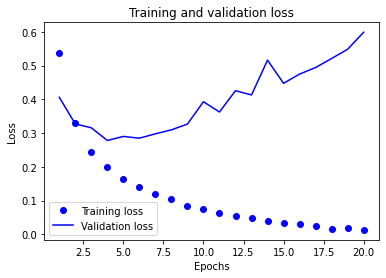

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

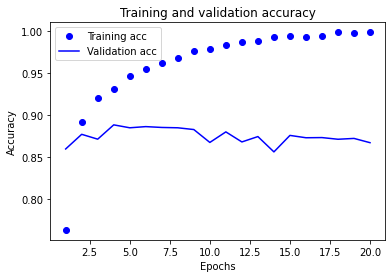

In [30]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
             loss='binary_crossentropy', 
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4607 - accuracy: 0.8152
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2736 - accuracy: 0.9032
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2159 - accuracy: 0.9221
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2861 - accuracy: 0.8866


In [33]:
results

[0.28606975078582764, 0.8866000175476074]

In [34]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.22606963],
       [0.9992538 ],
       [0.9218388 ],
       ...,
       [0.12708294],
       [0.08558197],
       [0.7231776 ]], dtype=float32)